In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# -------------------------------
# Scikit-Learn (Machine Learning utilities)
# -------------------------------
from sklearn.model_selection import train_test_split
#  Splits the dataset into training and testing sets to evaluate model performance.

from sklearn.preprocessing import LabelEncoder, StandardScaler
# LabelEncoder: Converts categorical labels (e.g., "cat", "dog") into numeric values.
# StandardScaler: Normalizes/standardizes numerical features so they have mean=0 and variance=1.

from sklearn.linear_model import Perceptron
# A simple linear classifier (single-layer neural network). Good for binary classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy_score: Measures how many predictions are correct.
# classification_report: Shows precision, recall, and F1-score for each class.
# confusion_matrix: Shows where the model is making correct vs wrong predictions.

# -------------------------------
# TensorFlow / Keras (Deep Learning utilities)
# -------------------------------
import tensorflow as tf

from tensorflow.keras.models import Sequential
# Lets you build a neural network layer-by-layer in a linear fashion.

from tensorflow.keras.layers import Dense
# Fully connected layer (every neuron connects to every neuron in the next layer).

from tensorflow.keras.layers import Dropout
# Randomly drops some neurons during training to prevent overfitting.

from tensorflow.keras.utils import to_categorical
# 👉 Converts class labels (like 0, 1, 2) into one-hot encoded format (e.g., [1,0,0], [0,1,0]).

In [9]:
df = pd.read_csv('iris_with_id.csv')

In [10]:
df.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [11]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


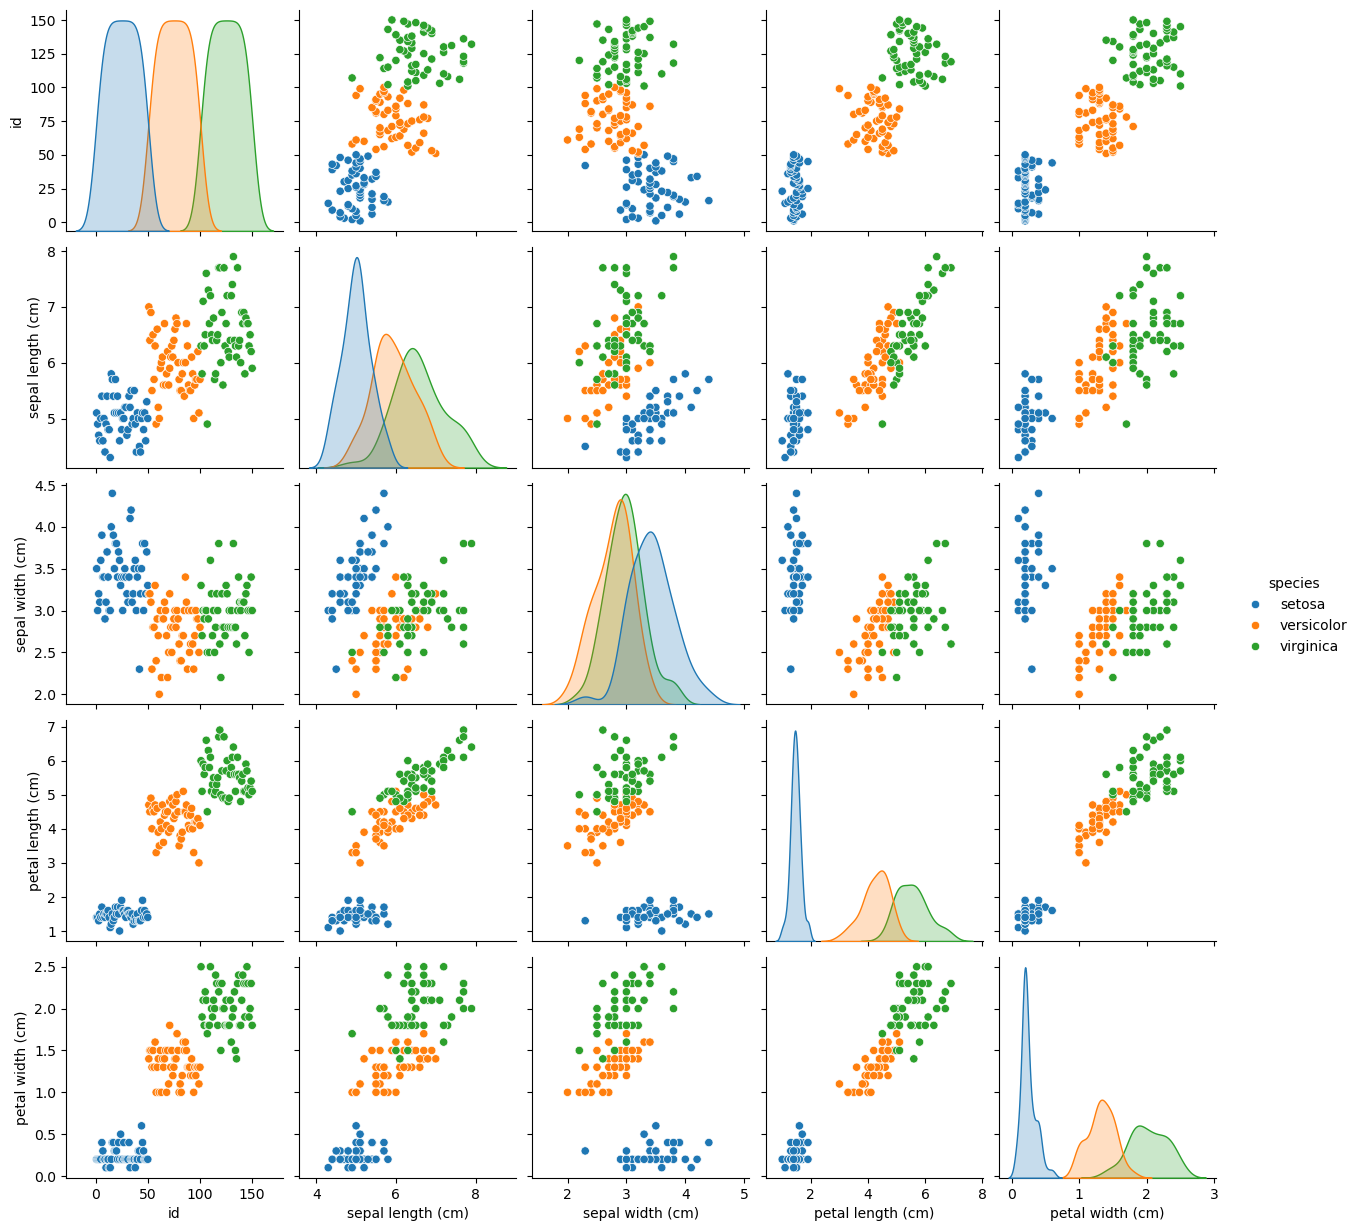

In [13]:

sns.pairplot(df,hue ='species')

In [14]:

X = df.drop(columns= ['species','id'],axis = 1 )
y = df['species']

In [16]:
encoder = LabelEncoder()
y_int = encoder.fit_transform(y)

In [17]:
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
X, y_int, test_size=0.2, random_state=42,stratify=y_int)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
per = Perceptron(max_iter = 1000,random_state=42)
per.fit(X_train_scaled, y_train)

Perceptron(random_state=42)

In [21]:
y_pred_percep = per.predict(X_test_scaled)

In [22]:
accuracy_score(y_test,y_pred_percep)

0.9

In [23]:
print(classification_report(y_test,y_pred_percep))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [24]:
y_train_cat = to_categorical(y_train,num_classes = 3)
y_test_cat = to_categorical(y_test,num_classes = 3)


In [25]:
model = Sequential([
    Dense(16,input_dim = 4,activation='relu'),
    Dense(8,activation='relu'),
    Dense(3,activation='softmax')
])

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train_scaled,y_train_cat,
                    epochs = 100,batch_size= 8, validation_split = 0.2,verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3646 - loss: 1.2486 - val_accuracy: 0.2500 - val_loss: 1.2381
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3542 - loss: 1.1112 - val_accuracy: 0.2500 - val_loss: 1.1202
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3542 - loss: 1.0174 - val_accuracy: 0.2500 - val_loss: 1.0315
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3646 - loss: 0.9336 - val_accuracy: 0.2500 - val_loss: 0.9620
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4896 - loss: 0.8668 - val_accuracy: 0.3750 - val_loss: 0.9011
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6042 - loss: 0.8104 - val_accuracy: 0.5000 - val_loss: 0.8471
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6562 - loss: 0.7600 - val_accuracy: 0.5833 - val_loss: 0.7981
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6875 - loss: 0.7169 - val_accuracy: 0.

In [28]:
loss, acc = model.evaluate(X_test_scaled, y_test_cat, verbose=1)
print(acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 0.9333 - loss: 0.1191
0.9333333373069763


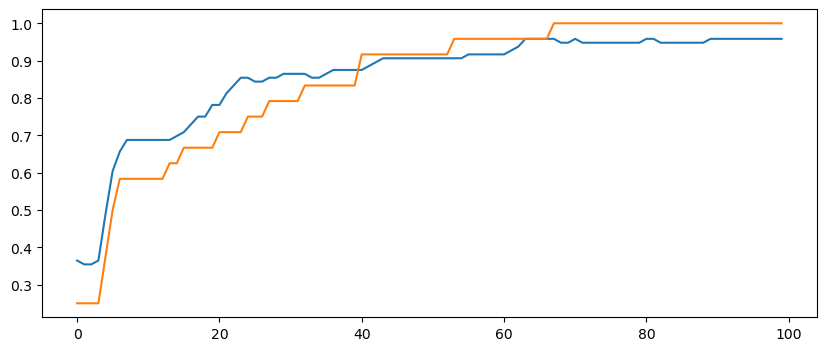

In [29]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'],label = "train Acc")
plt.plot(history.history['val_accuracy'],label = "val Acc")